#### FinanceDataReader/tutorial/FinanceDataReader Tutorial - 여러 종목의 가격을 한번에

In [19]:
import matplotlib as mpl
mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [4]:
import FinanceDataReader as fdr

###### 한 종목의 가격 가져오기

In [21]:
df = fdr.DataReader('105560', '2019-01-01', '2019-12-31')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,46700,46900,45600,45950,636199,-0.011828
2019-01-03,46600,46800,46200,46450,1275976,0.010881
2019-01-04,46500,46600,45600,45650,784105,-0.017223
2019-01-07,45800,46650,45450,45450,957133,-0.004381
2019-01-08,45900,45950,45300,45500,868450,0.001100
...,...,...,...,...,...,...
2019-12-23,48500,49900,48500,49900,878027,0.017329
2019-12-24,49900,50000,49200,49450,602123,-0.009018
2019-12-26,49450,49550,48950,49400,717331,-0.001011


###### 여러 종목의 종가(Close) 가져오기

In [22]:
stock_list = [
    ["삼성전자", "005930"],
    ["SK하이닉스", "000660"],
    ["현대차", "005380"],
    ["셀트리온", "068270"],
    ["LG화학", "051910"],
    ["POSCO", "005490"],
    ["삼성물산", "028260"],
    ["NAVER", "035420"],    
]

In [23]:
import pandas as pd

df_list = [fdr.DataReader(code, '2019-01-01', '2019-12-31')['Close'] for name, code in stock_list]
len(df_list)

8

In [24]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.head()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2019-01-02,38750,60600,114000,201193,337000,237000,104000,118000
2019-01-03,37600,57700,116500,197441,328000,237000,104500,122000
2019-01-04,37450,58300,119500,206352,330500,239000,107000,125500
2019-01-07,38750,58700,120500,202599,343000,246000,108000,131500
2019-01-08,38100,59200,119500,200254,349500,245500,107000,130000


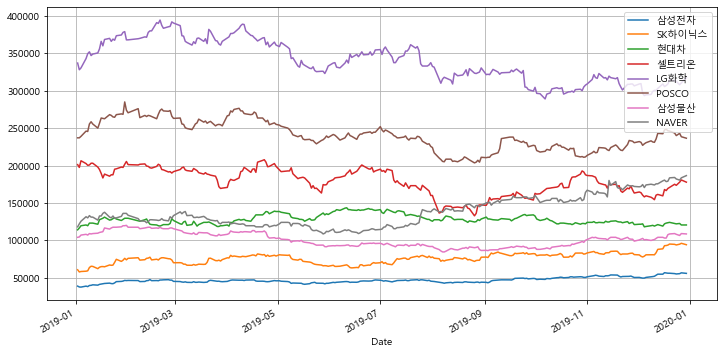

In [26]:
plt.rc('font', family='Malgun Gothic')
df.plot()

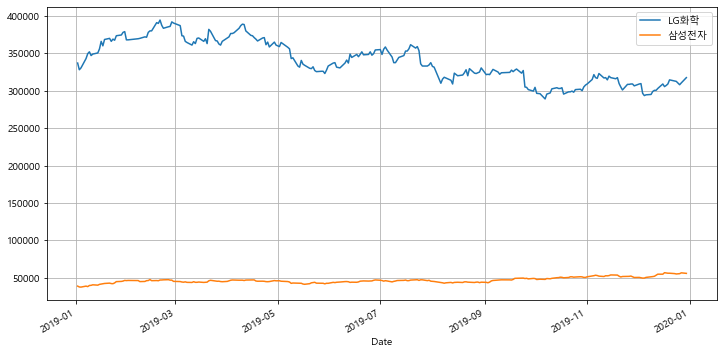

In [27]:
df[['LG화학', '삼성전자']].plot()

**Secondary_y Option을 활용하하여 서로 다른 영역의 값 비교하기**

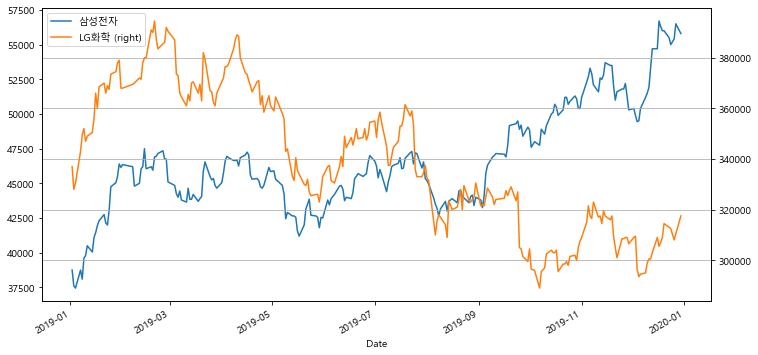

In [29]:
df[['삼성전자', 'LG화학']].plot(secondary_y=['LG화학'])

**- 두 주식 정보의 x축에 해당하는 Date정보의 시작점이 다른 이유로, 분석이 어려움**\
**- 해결에 용이하도록, Date정보의 시작점을 '0'으로 맞추고 시간에 따른 수익률을 보기 위해 첫 번째 행(row)로 모든 행을 나누고 1을 빼준다.**

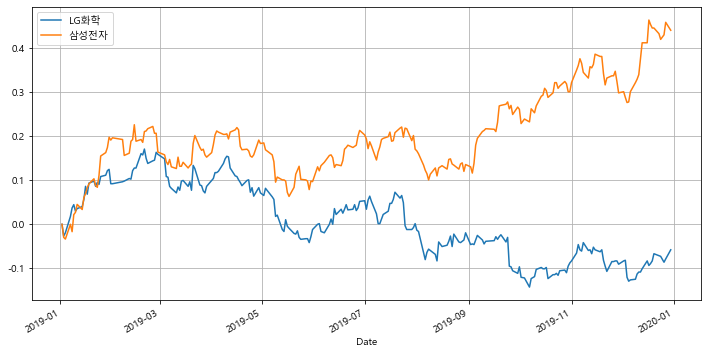

In [32]:
df2 = df[['LG화학', '삼성전자']]

df_plot = df2 / df2.iloc[0] - 1.0
df_plot.plot()

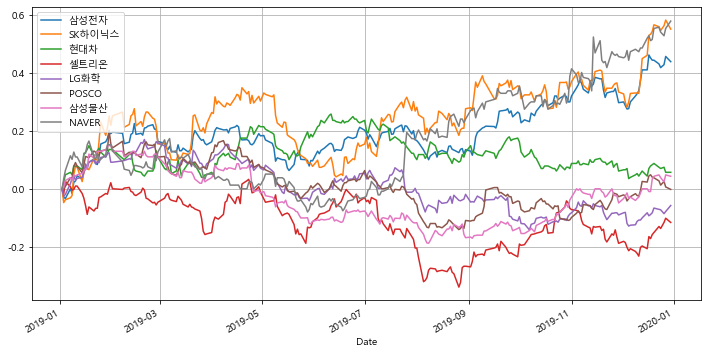

In [33]:
df_norm = df / df.iloc[0] - 1
df_norm.plot()

**수익률이 큰 종목부터 순서대로 나열 및 분석기간의 마지막날 수익률을 확인해보기.**

In [36]:
df_norm.iloc[-1].sort_values(ascending=False)

NAVER     0.580508
SK하이닉스    0.552805
삼성전자      0.440000
현대차       0.057018
삼성물산      0.043269
POSCO    -0.002110
LG화학     -0.057864
셀트리온     -0.116550
Name: 2019-12-30 00:00:00, dtype: float64

**- 2019년 가장 좋은 수익률은 NAVER 58.0%, SK하이닉스 55.2%**\
**- LG화학과 셀트리온이 각각 -5.7%, -11.6%를 년 수익률을 기록**